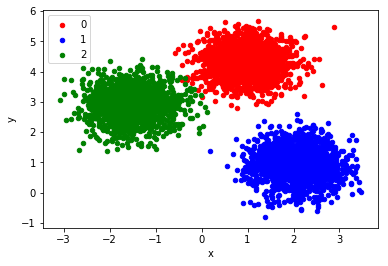

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
%matplotlib inline


#ONE LAYER 3 CLASS CLASSIFICATION PROBLEM WITH SOFT MAX

'''N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Ytrue = y
'''

training_samples = 5000
classes = 3
features = 2
Xmother, ymother = make_blobs(n_samples = training_samples, centers = classes, n_features = features, cluster_std = 0.5, random_state = 0 )

X = Xmother
Ytrue = ymother

m = Ytrue.shape[0]
Y = scipy.sparse.csr_matrix((np.ones(m), (Ytrue, np.array(range(m)))))
Y = np.array(Y.todense()).T

y_pred = np.zeros((len(ymother),1))

df = DataFrame(dict(x=X[:,0], y=X[:,1], label=ymother))
colors = {0:'red', 1:'blue', 2:'green',3:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [4]:
#NEURAL NET PARAMETERS
n_input = 4
n_hidden_node = 3
np.random.seed(3)

learning_rate = 1e-5

w2 = [ [0.1,0.2,0.3],
       [0.1,0.2,0.3] ]

b2 = [0.01, 0.1, 0.1] #np.zeros((1,n_hidden_node))

np.random.seed(3)
w1 = np.random.randn(2,classes)
b1 = np.zeros((1,classes))

print w1
print b1

[[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]]
[[ 0.  0.  0.]]


In [5]:
def softmax(x):
    temp1 = np.exp(x)
    temp2 = (np.sum(np.exp(x),axis=1).reshape(-1,1))
    return temp1/temp2

In [6]:
max_iter = 500
ls_cost = np.zeros(max_iter)

for i in range(max_iter):
        
    z1 = np.dot(X,w1) + b1 
    z1 -= z1.max(axis=1).reshape([-1, 1]) #FOR NUMERICAL STABILITY COMPUTER IS ANGERY AT BIG E
    A1 = softmax(z1) #ALSO h1
    
    #LAST PIECE IS TO REGULARIZE AND GUARANTEE LOCAL MINIMUM IS REACH
    loss = -1/len(X) * np.sum(Y * np.log(A1)) + (1/2)*np.sum(w1*w1) #MATRIX A * MATRIX B IS ELEMENT WISE MULTIPLICATION
    
    grad = -1/len(X) * np.dot(np.transpose(X), Y - A1) + 1*w1
    
    w1 = w1 - learning_rate * grad
    
    ls_cost[i] = loss

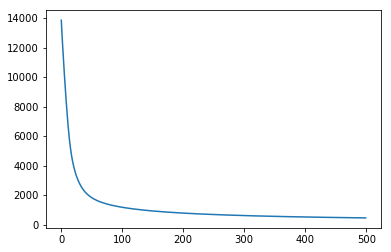

In [7]:
plt.plot(ls_cost)

In [8]:
#CREATE MESH POINTS FOR CREATING DECISION BOUNDARY
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

XY = np.c_[xx.ravel(), yy.ravel()]

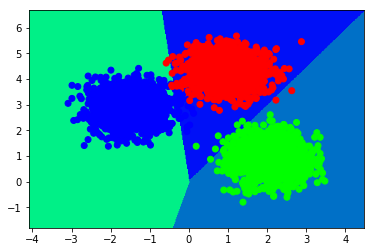

In [9]:
Z1 = np.dot(XY,w1) + b1
Z1 -= Z1.max(axis=1).reshape([-1, 1])
H1temp = softmax(Z1)

H1 = np.argmax(H1temp,axis=1)

Ypred  = H1.reshape(xx.shape)
cmap = plt.cm.get_cmap("winter")
plt.contourf(xx, yy, Ypred, cmap=cmap )
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [ ]:
#linear classifier insufficient for spiral. need extra layer